# PCA&UMP

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sys
 
def distancematrix(test):
    leng=len(test)
    resmat=np.zeros([leng,leng],np.float32)
    for i in range(leng):
      for j in range(leng):
          resmat[i,j]=np.linalg.norm(test[i]-test[j])
    return resmat
def mds(test,deg):
    length= len(test)
    re= np.zeros((length, length),np.float32)
    if(deg>length):
        deg=length
    D= distancematrix(test)
    ss = 1.0 /length ** 2 * np.sum(D ** 2)
    for i in range(length):
        for j in range(length):
            re[i, j] = -0.5 * (D[i, j] ** 2 - 1.0 / length * np.dot(D[i, :], D[i, :]) - 1.0 / length * np.dot(D[:, j], D[:, j]) + ss)
 
    A, V = np.linalg.eig(re)
    list_idx = np.argpartition(A, deg- 1)[-deg:]
    a = np.diag(np.maximum(A[list_idx], 0.0))
    return np.matmul(V[:, list_idx], np.sqrt(a))

def usedijk(test, start):
    count = len(test)
    col= test[start].copy()
    rem = count - 1
    while rem > 0:
        i= np.argpartition(col, 1)[1]
        length = test[start][i]
        for j in range(count):
            if test[start][j] > length + test[i][j]:
                test[start][j] = length + test[i][j]
                test[j][start] = test[start][j]
        rem -= 1
        col[i] = float('inf')
 

def isomap(test, target, k):
    inf = float('inf')
    count = len(test)
    if k >= count:
        raise ValueError('K is too large')
    mat_distance = distancematrix(test)
    knear = np.ones([count, count], np.float32) * inf
    for idx in range(count):
        topk = np.argpartition(mat_distance[idx], k)[:k + 1]
        knear[idx][topk] = mat_distance[idx][topk]
    for idx in range(count):
        usedijk(knear, idx)
    return mds(knear, target)
 
if __name__ == '__main__':
    print('start.....')
    D =np.array([[1,2,3,4],[2,1,5,6],[3,5,1,7],[4,6,7,1]]) #test data
    outcome= isomap(D, 2, 3)
    sys.stdout.write('finish\n')
    print(outcome) 
 
 

start.....
finish
[[ 2.6146607   2.1883557 ]
 [ 2.7561336   3.141336  ]
 [ 3.0071628  -5.1849847 ]
 [-8.377956   -0.14470631]]


UMAP

In [33]:
pip install umap-learn


In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import TensorDataset
from torch.optim import Adam, SGD

from sklearn.decomposition import PCA
import pylab

# Basic Numeric Computation
import numpy as np
import pandas as pd

# Look at data
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
#from math import pi
#from collections import Counter
import seaborn as sns
from sklearn.decomposition import PCA
import pylab
import time
from sklearn.manifold import TSNE
from sklearn import manifold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

In [36]:
from google.colab import files
uploaded = files.upload()


Saving fashion-mnist_train.csv to fashion-mnist_train (1).csv


In [37]:
train=pd.read_csv("fashion-mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [39]:
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test (1).csv


In [40]:
test=pd.read_csv("fashion-mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [38]:
import warnings
warnings.filterwarnings('ignore')
device = torch.device("cpu")
epochs=10
y_viz_train = train['label']
X_viz_train = train.drop('label', axis=1)
X_viz_test = test

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_viz_train = scaler.fit_transform(X_viz_train)
X_viz_test = scaler.fit_transform(X_viz_test)

In [42]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_viz_train)
principalDf =pd.DataFrame(data = principalComponents, columns = ['principalcomponent1',  'principalcomponent2'])

label = pd.DataFrame(list(train['label']))
principalDf = pd.concat([principalDf,label],axis = 1,join='inner', ignore_index=True)
principalDf = principalDf.loc[:,~principalDf.columns.duplicated()]
principalDf.columns = ["principalcomponent1", "principalcomponent2", "label"] 

In [43]:
principalDf.head()

,principalcomponent1,principalcomponent2,label
0,10.664973,14.993363,2
1,-11.989748,11.812770,9
2,20.517671,1.579784,6
3,9.634535,-6.790917,0
4,11.493442,-11.655488,3


<Figure size 936x720 with 0 Axes>

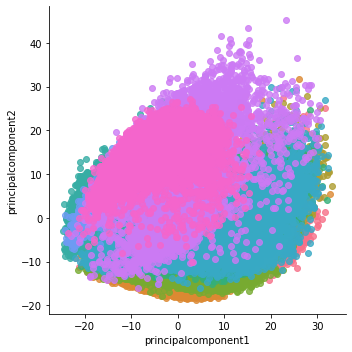

<Figure size 936x720 with 0 Axes>

In [44]:
flatui = ["#9b59b6", "#3498db", "orange"]
sns.set_palette(flatui)
sns.lmplot( x="principalcomponent1", y="principalcomponent2", data=principalDf, fit_reg=False,
           hue='label', legend=False)

plt.figure(figsize=(13,10))

In [45]:
N = 10000
df_subset = X_viz_train[:N,:].copy()

In [46]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = train.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [48]:
trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
#     hoverinfo= cum_var_exp,
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
#     hoverinfo= var_exp,
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')

This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



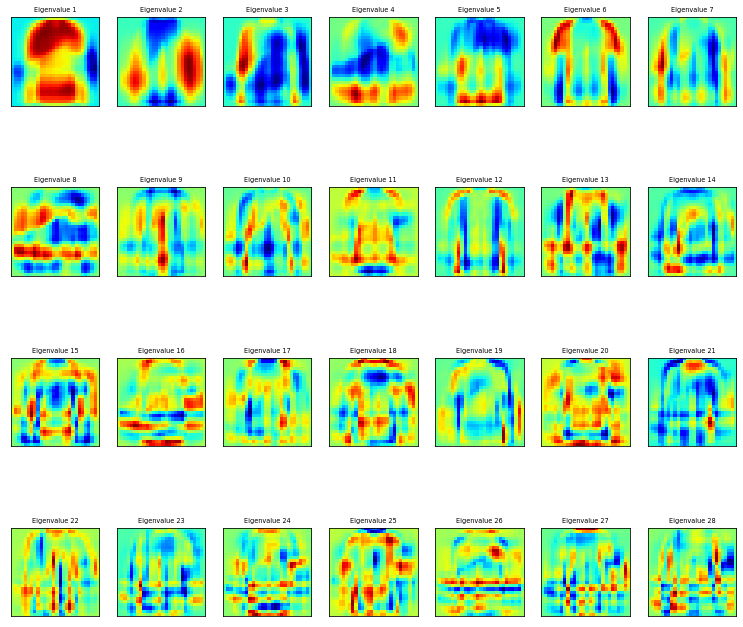

In [50]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

# tsne


In [51]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)
print('t-SNE done in {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 4.690s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.869340
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.274689
[t-SNE] KL divergence after 300 iterations: 2.257772
t-SNE done in 151.7716290

In [53]:
tsne3_subset = pd.DataFrame(columns=['tsne-3d-one', 'tsne-3d-two', 'tsne-3d-three'])

tsne3_subset['tsne-3d-one'] = tsne_results[:,0]
tsne3_subset['tsne-3d-two'] = tsne_results[:,1]
tsne3_subset['tsne-3d-three'] = tsne_results[:,2]

In [54]:
n_samples = 10000
X, color = make_swiss_roll(n_samples)

In [55]:
time_start = time.time()
tsne2d = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne2d_results = tsne.fit_transform(df_subset)
print('t-SNE done in {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 5.248s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.869340
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.276688
[t-SNE] KL divergence after 300 iterations: 2.254847
t-SNE done in 127.3850948

In [56]:
tsne2_subset = pd.DataFrame(columns=['tsne-2d-one', 'tsne-2d-two'])

tsne2_subset['tsne-2d-one'] = tsne2d_results[:,0]
tsne2_subset['tsne-2d-two'] = tsne2d_results[:,1]


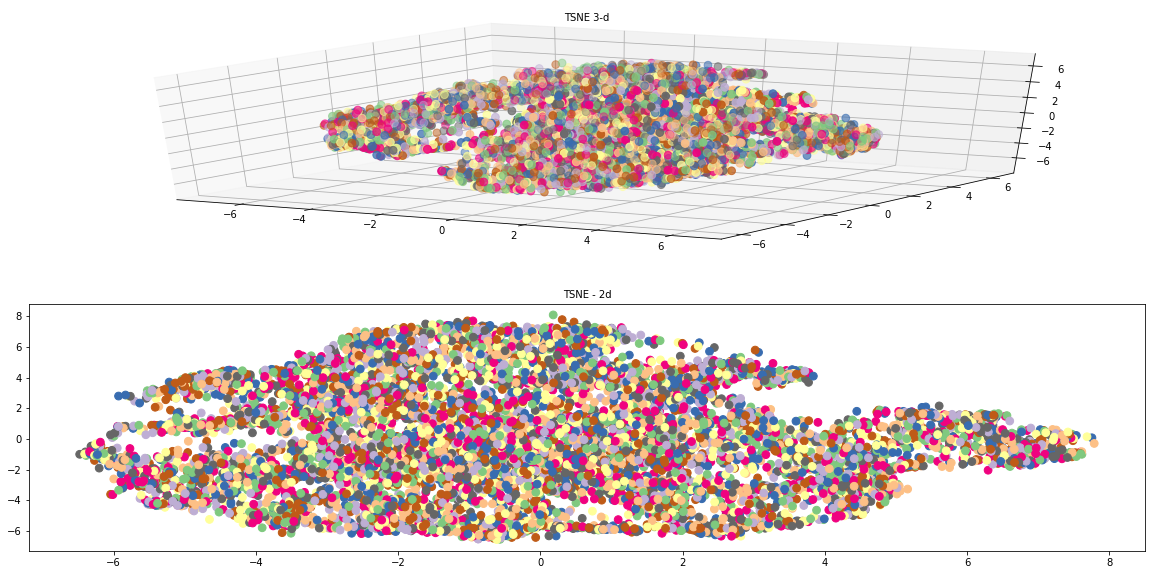

In [57]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('TSNE 3-d', fontsize=10)
ax.scatter(tsne_results[:,0],tsne_results[:,1],tsne_results[:,2],c = color,cmap="Accent",s=60)# we are picking up the x,y,z co-ordinate values from dataset
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('TSNE - 2d', fontsize=10)
ax.scatter(tsne2d_results[:,0],tsne2d_results[:,1],c = color,cmap="Accent",s=60)

# ISOMAP

In [58]:
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(X)
manifold_iso_data = iso.transform(X)

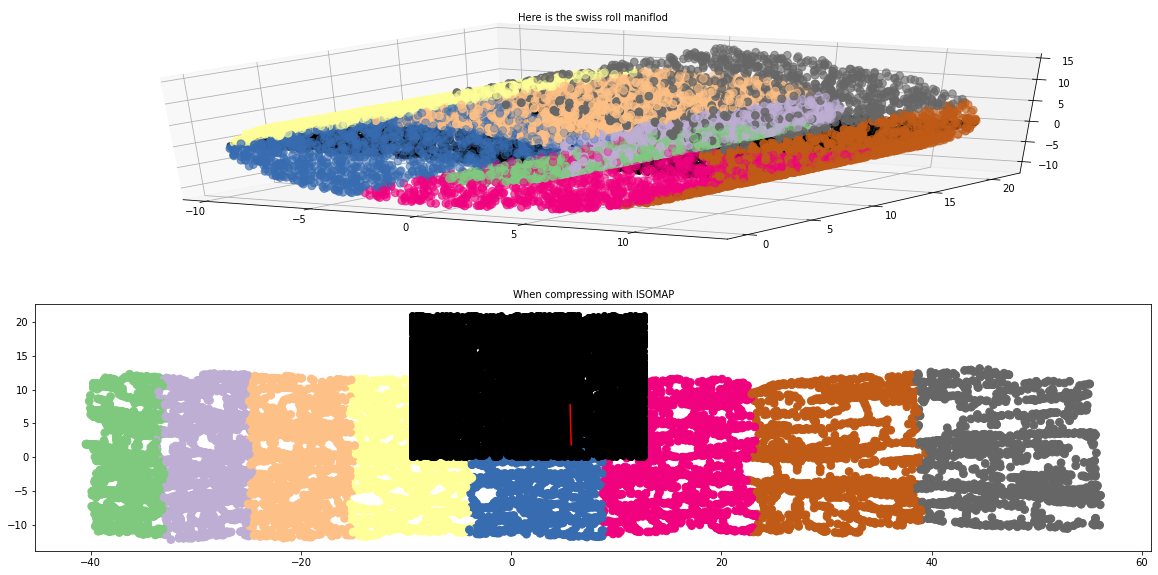

In [59]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)
x = X[:,0][2:10000] 
y = X[:,1][2:10000] # Just as abovve, this time for column 1
ax.scatter(x,y,c = "black") #Now we randomly plot this in both 3D manifold (this may not be clearly visible as the  existing
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
#Now we plot 2D after ISOMAP...
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_iso_data[:,0],manifold_iso_data[:,1],c = color,cmap="Accent",s=60)
x = X[:,0][2:10000]#Now we plot the same 'black' samples, after ISOMAP in 2D and observe the distance in 2D.
y = X[:,1][2:10000]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

In [60]:
train['label'].head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [62]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,32.830583,45.731017,52.064083,50.80245,50.459150,53.796217,51.396233,40.432733,26.083333,10.420583,4.079750,1.938183,1.177650,0.857983,0.461133,0.244300,0.092667,0.018333,0.006400,0.020617,0.098967,0.357200,0.767217,2.104583,7.331483,17.472317,32.009017,52.814583,79.349917,...,92.470233,90.523350,79.255767,62.576500,45.753283,43.970183,47.772400,38.841583,22.306933,9.280517,3.955417,0.631000,0.024633,0.218117,1.027250,4.352033,12.568183,20.847967,21.076467,17.152267,22.114933,30.559350,41.743617,51.506583,52.60855,46.479783,42.612733,45.309733,50.162100,46.438617,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,57.633860,65.964300,68.603587,67.86885,67.370188,69.467796,67.912739,62.639596,51.818389,32.591095,20.118496,13.953210,10.718718,9.256114,6.768024,4.953103,2.850576,1.232175,0.548966,1.184869,2.912779,6.523878,9.702476,15.977721,30.056073,47.953585,65.625544,82.122567,95.340204,...,100.912013,99.731484,95.172029,88.844198,78.434831,76.970849,83.212136,74.477031,55.983447,37.937984,24.953295,8.146274,0.968474,4.444904,10.030021,20.912278,36.920905,48.909477,48.263137,42.173000,48.241135,54.902062,61.963606,68.331468,69.76041,67.476669,66.267004,66.737520,68.705817,65.944847,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2

In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [64]:
test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,14.363500,33.625600,46.371400,52.705500,50.959500,50.722900,53.773300,51.668100,40.957300,26.241800,10.37650,4.142300,2.021100,1.125100,0.771200,0.452800,0.245900,0.067500,0.033900,0.008300,0.032400,0.125500,0.302700,0.720100,1.977300,7.117700,17.217500,31.759600,53.424700,81.266500,...,93.047300,90.600000,78.859100,61.960100,45.922200,44.413500,47.56900,38.041800,21.628900,8.533300,3.227400,0.46090,0.031600,0.215,0.888200,4.366100,12.836900,20.695900,20.847100,16.933400,22.210700,30.836100,42.304200,52.398200,52.929500,46.106400,42.722100,45.515100,50.258400,46.109200,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,37.911701,58.728202,66.622009,69.652762,68.646661,67.973606,69.853856,68.372231,63.562213,51.962122,32.75711,20.554695,14.091122,10.783361,9.136432,7.110811,5.773246,2.496271,1.938898,0.388904,1.288144,4.151876,5.003037,9.590733,15.750632,29.975719,47.858968,65.367595,82.516117,96.591129,...,101.315512,100.237952,95.316054,88.969202,78.893333,77.560636,83.26921,73.827424,54.836583,36.256582,22.229015,6.85644,1.303139,4.557,9.090213,20.445965,37.378604,48.704573,47.924505,42.155582,48.651452,55.721562,63.108566,69.561834,70.317282,67.675636,66.805592,67.386268,69.018887,66.423861,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.00

# SVD&LLE

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [4]:
train=pd.read_csv("fashion-mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [22]:
from google.colab import files
uploaded = files.upload()


Saving fashion-mnist_test.csv to fashion-mnist_test.csv


In [23]:
test=pd.read_csv("fashion-mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train.shape)

(60000, 785)


In [6]:
# save the labels to a Pandas series target
target = train['label']
# Drop the label feature
train = train.drop("label",axis=1)

In [ ]:
#Iris.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.shape

(150, 6)

In [ ]:
X_variables = data.iloc[:,1:5]
X_variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y_variable = data.iloc[:,5]
y_variable

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
messages=data.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

In [ ]:
covariance_matrix = np.cov(transformed_df.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


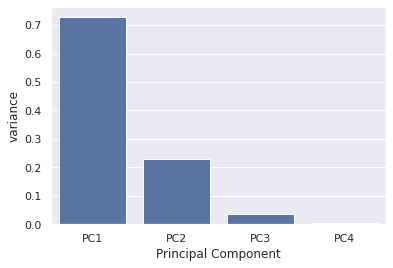

In [ ]:
pca = PCA()
pca = pca.fit(transformed_df)
explained_variance = pca.explained_variance_ratio_
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

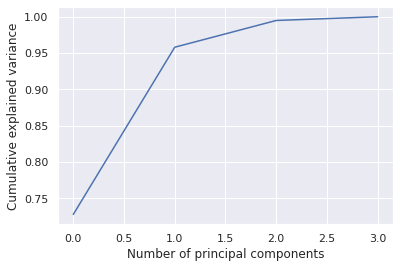

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:

pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X_variables)

In [ ]:
data['Species'] = data['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

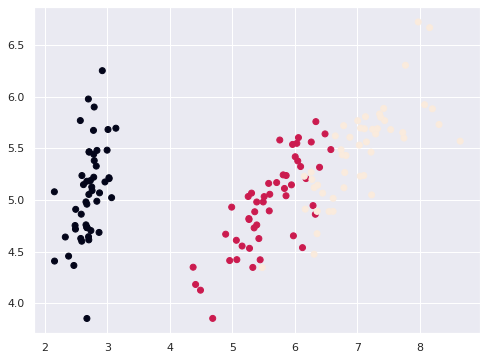

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(pca_2d[:,0], pca_2d[:,1],c=data['Species'])
plt.show()

In [ ]:
pca_4 = PCA(n_components =4 )
pca_4 = pca_4.fit(transformed_df)
pca_4d = pca_4.transform(X_variables)

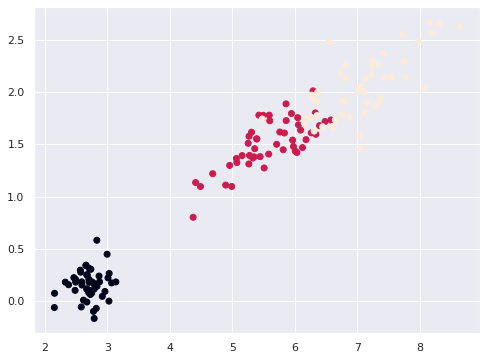

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(pca_4d[:,0], pca_4d[:,3],c=data['Species'])
plt.show()

SVD

In [ ]:
#mushrooms.csv
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [ ]:
data2=pd.read_csv("mushrooms.csv")
data2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
data2.shape

(8124, 23)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:

encoder = LabelEncoder()
for col in data2.columns:
    data2[col] = encoder.fit_transform(data2[col])
data2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
X_variables = data2.iloc[:,1:23]
y_label = data2.iloc[:, 0]

In [ ]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_variables)

In [ ]:
u, s, v = np.linalg.svd(X_features, full_matrices=True)

In [ ]:
u.shape

(8124, 8124)

In [ ]:
s.shape

(22,)

In [ ]:
v.shape

(22, 22)

In [ ]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 


array([0.184, 0.124, 0.114, 0.103, 0.081, 0.066, 0.047, 0.045, 0.037,
       0.034, 0.027, 0.026, 0.024, 0.023, 0.018, 0.015, 0.01 , 0.008,
       0.006, 0.003, 0.003, 0.   ])

Text(0, 0.5, 'Percent of the variance explained')

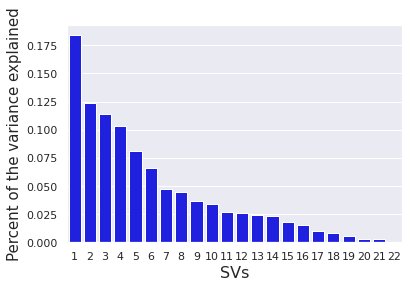

In [ ]:
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [ ]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=data2["class"].tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,1,0.003238,-0.006710
1,0,0.012864,0.001919
2,0,0.010474,-0.001863
3,1,0.004988,-0.005202
4,0,-0.003887,0.008522


In [ ]:
svd_df['Class'] = svd_df['Class'].replace({1:'Edible', 0:'Poison'})

Text(0, 0.5, 'SV 2: 12.4%')

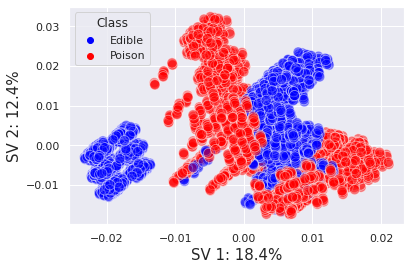

In [ ]:
color_dict = dict({'Edible':'Blue',
                   'Poison': 'Red'})
# Scatter plot: SV1 and SV2
sns.scatterplot(x="SV1", y="SV2", hue="Class", 
                palette=color_dict, 
                data=svd_df, s=105,
                alpha=0.5)
plt.xlabel('SV 1: {0}%'.format(variance_explained[0]*100), fontsize=15)
plt.ylabel('SV 2: {0}%'.format(variance_explained[1]*100), fontsize=15)

LLE

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 198 kB 54.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=ff5f50fb786e7f9b6817b4f7b52b38c6ce7805c74518d0d79aab0d308f08d8e9
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
from sklearn.neighbors import NearestNeighbors 
from sklearn import datasets, neighbors
import numpy as np

iris_ = datasets.load_iris()

iris = iris_.data
def Knbor_Mat(X, K, t = 2.0, dist_metric = "euclidean", algorithm = "ball_tree"):
    
    n,p = X.shape
    
    knn = neighbors.NearestNeighbors(K+1, metric = dist_metric, algorithm=algorithm).fit(X)
    distances, nbors = knn.kneighbors(X)
    
    return(nbors[:,1:])

In [ ]:
from scipy import linalg

def get_weights(X, nbors, reg, K):
    
    n,p = X.shape
    
    Weights = np.zeros((n,n))
    
    for i in range(n):
        
        X_bors = X[nbors[i],:] - X[i]
        cov_nbors = np.dot(X_bors, X_bors.T)
        
        #regularization tems
        trace = np.trace(cov_nbors)
        if trace >0 :
            R = reg*trace
        else:
            R = reg
        
        cov_nbors.flat[::K+1] += R
        weights = linalg.solve(cov_nbors, np.ones(K).T, sym_pos=True)

        weights = weights/weights.sum()
        Weights[i, nbors[i]] = weights
        
    return(Weights)

In [ ]:
from scipy.linalg import eigh

def Y_(Weights,d):
    n,p = Weights.shape
    I = np.eye(n)
    m = (I-Weights)
    M = m.T.dot(m)
    
    eigvals, eigvecs = eigh(M, eigvals=(1, d), overwrite_a=True)
    ind = np.argsort(np.abs(eigvals))
    
    return(eigvecs[:, ind])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.datasets import samples_generator
from matplotlib.pyplot import spectral

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

def LLE_(X, K):
    reg =0.001
    nbors = Knbor_Mat(X,K)
    print(nbors[0])
    Weights = get_weights(X, nbors, reg,K)
    
    Y = Y_(Weights,2)
    return(Y)
test = [354,520, 246,134,3, 983, 186, 436, 893, 921]
def plotter(K):
    fig = plt.figure(figsize=(10,8))
    Y = LLE_(X , K)
    s = Y[test]
    plt.scatter(Y[:,0],Y[:,1],c=color, cmap=plt.cm.spectral)
    plt.scatter(s[:,0],s[:,1], c="black")

interact(plotter, K= widgets.IntSlider(min=10, max=100, value=10, step=10))

<function __main__.plotter>

<Figure size 720x576 with 0 Axes>

In [ ]:
from sklearn import datasets
from pyspark.sql import SQLContext as SQC
from pyspark.mllib.linalg import Vectors as mllibVs, VectorUDT as mllibVUDT
from pyspark.ml.linalg import Vectors as mlVs, VectorUDT as mlVUDT
from pyspark.sql.types import *
from pyspark.mllib.linalg import *
from pyspark.sql.functions import *
from pyspark.ml.feature import StandardScaler
from pyspark.mllib.linalg.distributed import IndexedRowMatrix
import math as m
import numpy as np

In [ ]:
def get_weights(map_list, k, features, reg):


    sorted_map = sorted(map_list, key = lambda x: x[1])[1:(k+1)]

    neighbors = np.array([s[2] for s in sorted_map])
    ind = [s[0] for s in sorted_map]

    nbors, n_features = neighbors.shape

    neighbors_mat = neighbors - features.toArray().reshape(1,n_features)

    cov_neighbors = np.dot(neighbors_mat, neighbors_mat.T)

    # add regularization term
    trace = np.trace(cov_neighbors)
    if trace > 0:
        R = reg * trace
    else:
        R = reg

    cov_neighbors.flat[::nbors + 1] += R

    weights = linalg.solve(cov_neighbors, np.ones(k).T, sym_pos=True)
    weights = weights/weights.sum()

    full_weights = np.zeros(len(map_list))
    full_weights[ind] = weights

    return(Vectors.dense(full_weights))

udf_sort = udf(get_weights, mllibVUDT())

data2 = data2.withColumn("weights", udf_sort("map", lit(10), "features", lit(0.001)))

In [ ]:
# udf for creating a row of identity matrix 
def I(ind):
    i = [0]*150
    i[ind]=1.0
    return(mllibVs.dense(i))

# convert dataframe to indexedrowmatrix
weights_irm = IndexedRowMatrix(data2.select(["id","weights"]).rdd.map(lambda x:(x[0],  I(x[0])-x[1])))
M = weights_irm.toBlockMatrix().transpose().multiply( weights_irm.toBlockMatrix() )

SVD = M.toIndexedRowMatrix().computeSVD(150, True)

# select the vectors for low dimensional embedding
lle_embbeding = np.fliplr(SVD.V.toArray()[:,-(d+1):-1])

t-SNE


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)
'''输出
[[   3.17274952 -186.43092346]
 [  43.70787048 -283.6920166 ]
 [ 100.43157196 -145.89025879]
 [ 140.96669006 -243.15138245]]'''

[[174.17831  189.75137 ]
 [332.5468   340.47995 ]
 [ 23.449465 348.1196  ]
 [181.81798  498.8482  ]]


'输出\n[[   3.17274952 -186.43092346]\n [  43.70787048 -283.6920166 ]\n [ 100.43157196 -145.89025879]\n [ 140.96669006 -243.15138245]]'

t-SNE: 7.2 sec


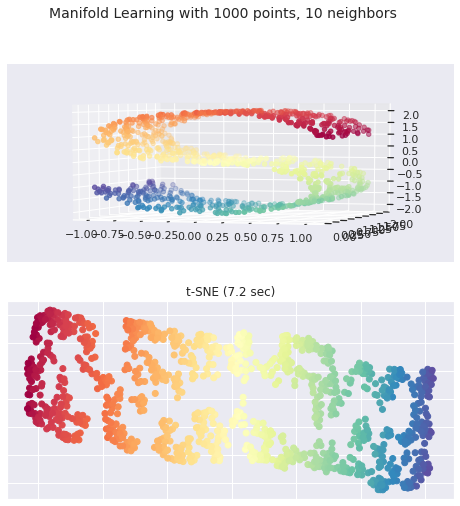

In [ ]:
# coding='utf-8'

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
from sklearn.datasets import samples_generator

# # Next line to silence pyflakes. This import is needed.
# Axes3D

n_points = 1000
\
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(8, 8))

plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72) 

'''t-SNE'''
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X) 
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))  
ax = fig.add_subplot(2, 1, 2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())  
ax.yaxis.set_major_formatter(NullFormatter())
# plt.axis('tight')

plt.show()

Computing t-SNE embedding


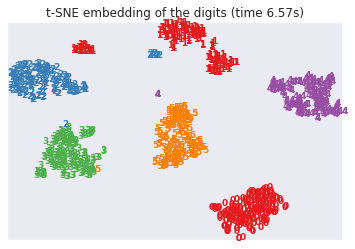

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE


def get_data():
    digits = datasets.load_digits(n_class=6)
    data = digits.data
    label = digits.target
    n_samples, n_features = data.shape
    return data, label, n_samples, n_features


def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig


def main():
    data, label, n_samples, n_features = get_data()
    print('Computing t-SNE embedding')
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    t0 = time()
    result = tsne.fit_transform(data)
    fig = plot_embedding(result, label,
                         't-SNE embedding of the digits (time %.2fs)'
                         % (time() - t0))
    plt.show(fig)


if __name__ == '__main__':
    main()